<a href="https://colab.research.google.com/github/karthikchunduru/Question_pair_similarity/blob/master/question_pair_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [4]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/quora_train.csv');


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
si=len(df)

In [ ]:
si

404290

In [ ]:
ans=df.groupby('is_duplicate')['id'].count()

In [ ]:
print("percentage of question pairs that are similar",(round(ans[0]/si,2))*100,"%")

percentage of question pairs that are similar 63.0 %


In [ ]:
print("percentage of question pairs that are similar",(round(ans[1]/si,2))*100,"%")

percentage of question pairs that are similar 37.0 %


In [ ]:
bo=df[df.duplicated()]

In [ ]:
len(bo)

0

<p> There are no duplicates </p> 

In [ ]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())


In [ ]:
print("Total no of unique questions:",len(np.unique(qid)))

Total no of unique questions: 537933


In [ ]:
uni=qid.value_counts()
print(uni)

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64


In [ ]:
len(uni)

537933

[]

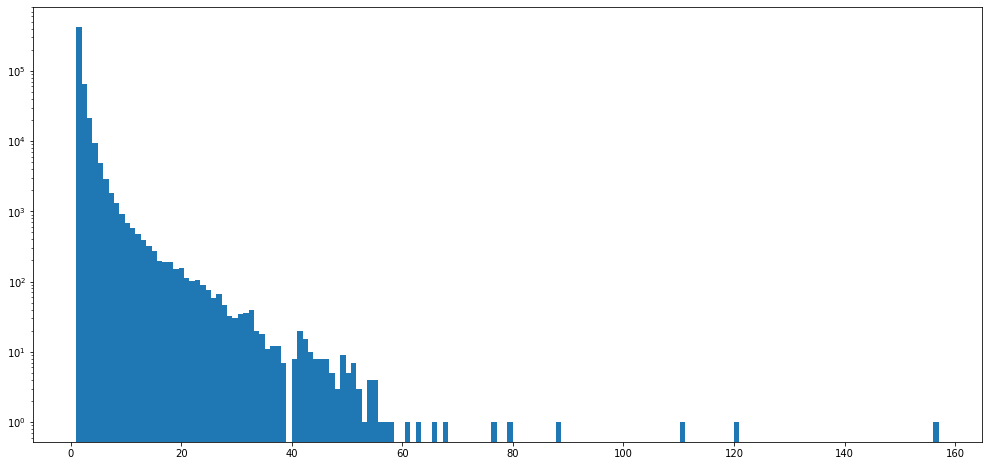

In [ ]:
plt.figure(figsize=(17, 8))
plt.hist(uni,bins=160)
plt.yscale('log', nonposy='clip')
plt.plot()

Checking for the null values


In [ ]:
row=df[df.isnull().any(1)]   

In [ ]:
row

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [ ]:
df = df.fillna('')
ro=df[df.isnull().any(1)]

In [ ]:
ro

,id,qid1,qid2,question1,question2,is_duplicate


<h1> <b>Adding some Basic Features</b> </h1>

- **frequency of questino 1 occurs**

In [ ]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 

- **frequency of question 2 occurs**

In [ ]:
df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')

- **length of question 1**

In [ ]:
df['q1_len']=df['question1'].transform(func =lambda s: len(s) )

- **length of question 2**

In [ ]:
df['q2_len']=df['question2'].transform(func=lambda s: len(s))

- **no of words in question 1**

In [ ]:
df['q1_wordscount']=df['question1'].transform(func=lambda s:len(s.split(" ")))

- **no of words in question 2**


In [ ]:
df['q2_wordscount']=df['question2'].transform(func=lambda s:len(s.split(" ")))

- **no of common words between queston 1 and question 2**

In [ ]:
def word_common(row):
  q1=row['question1'].lower()
  q2=row['question2'].lower()
  q1=set(q1.split(" "))
  q2=set(q2.split(" "))
  return len(q1&q2)
df['common_words_count']=df.apply(word_common,axis=1)


- **total words count**

In [ ]:
def cou(row):
  return len(set(row['question1'].split()))+len(set(row['question2'].split()))
df['tot_words']=df.apply(cou,axis=1)

- **words ratio =(common_words_count/tot_words)**

In [ ]:
def rati(row):
  return row['common_words_count']/row['tot_words']
df['words_ratio']=df.apply(rati,axis=1)

- **total frequency of question 1 and question 2 add_freq=freq_qid1+freq_qid2**

In [ ]:
def addfreq(row):
  return (row['freq_qid1']+row['freq_qid2'])
df['add_freq']=df.apply(addfreq,axis=1)


- **subraction of frequency of question 1 and question 2 sub_freq=abs(freq_qid1-freq_qid2)**

In [ ]:
df['sub_freq']=df.apply(lambda row:abs(row['freq_qid1']-row['freq_qid2']),axis=1)


In [ ]:
df

**<h1> Feature Analysis </h1>**

In [ ]:
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

def plo(var1,var2):
  plt.figure(figsize=(12,8))
  plt.subplot(1,2,1)
  sns.violinplot(x=var1,y=var2,data=df)
  plt.subplot(1,2,2)
  sns.distplot(df[df[var1]==1][var2],label=1,color='red')
  sns.distplot(df[df[var1]==0][var2],label=0,color='blue')
  plt.legend()
  plt.plot()



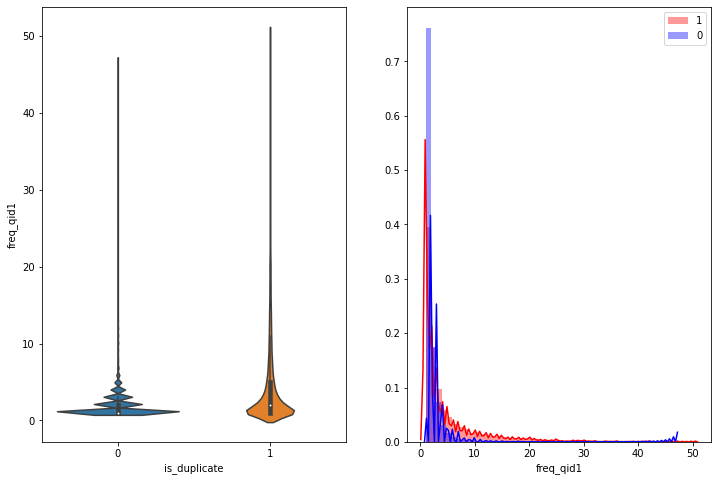

In [ ]:
plo('is_duplicate','freq_qid1')

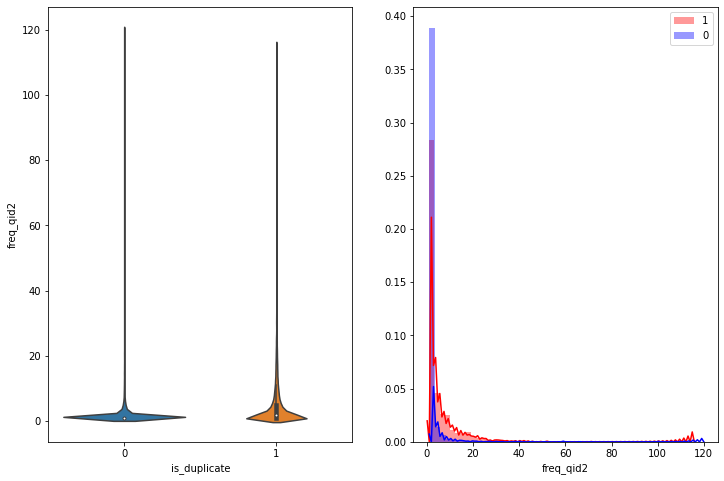

In [ ]:
plo('is_duplicate','freq_qid2')

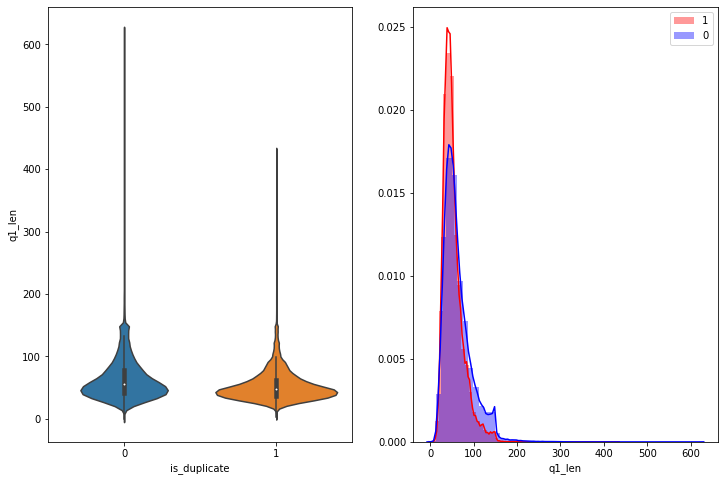

In [ ]:
plo('is_duplicate','q1_len')

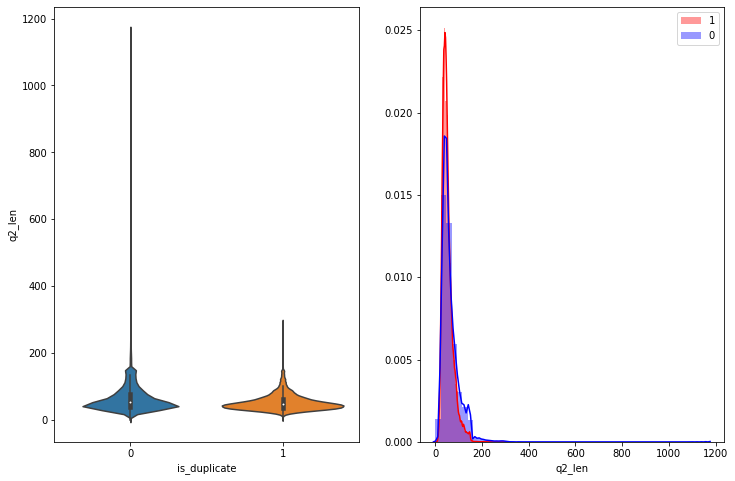

In [ ]:
plo('is_duplicate','q2_len')

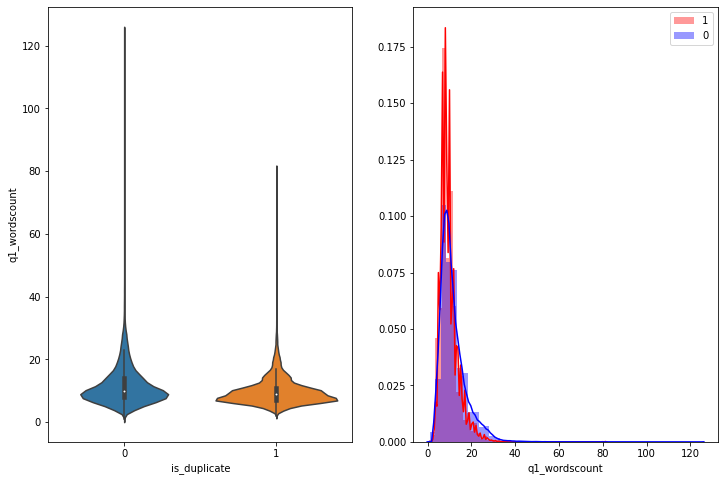

In [ ]:
plo('is_duplicate','q1_wordscount')

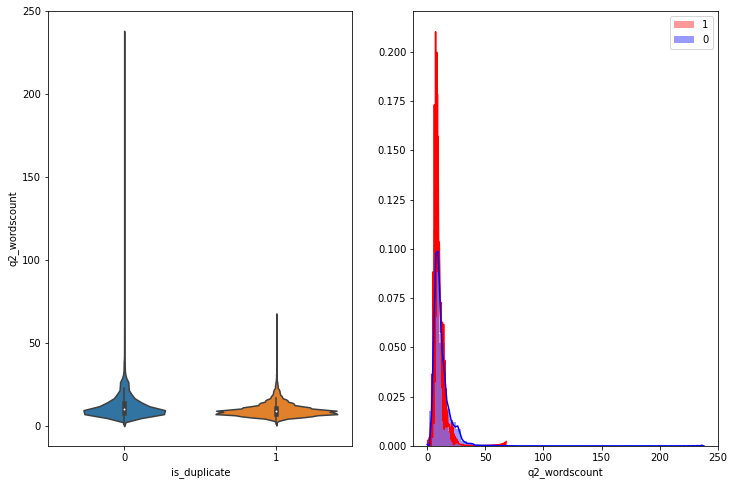

In [ ]:
plo('is_duplicate','q2_wordscount')

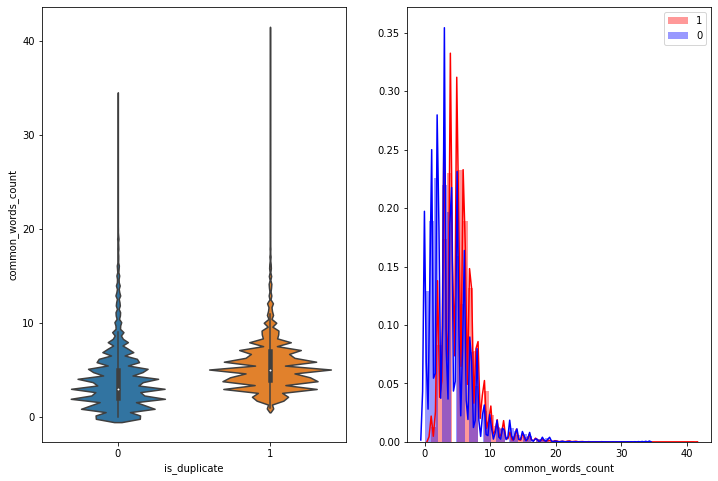

In [ ]:
plo('is_duplicate','common_words_count')

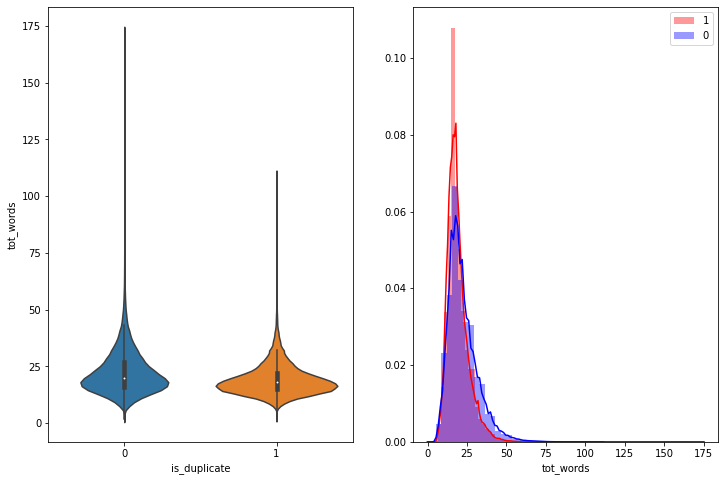

In [ ]:
plo('is_duplicate','tot_words')

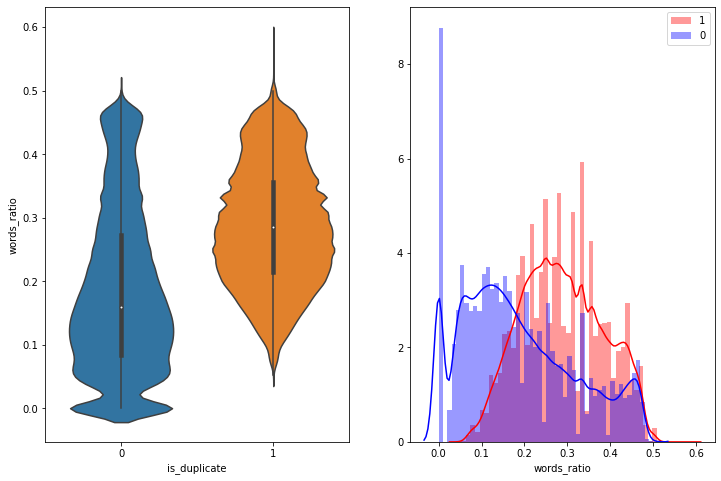

In [ ]:
plo('is_duplicate','words_ratio')

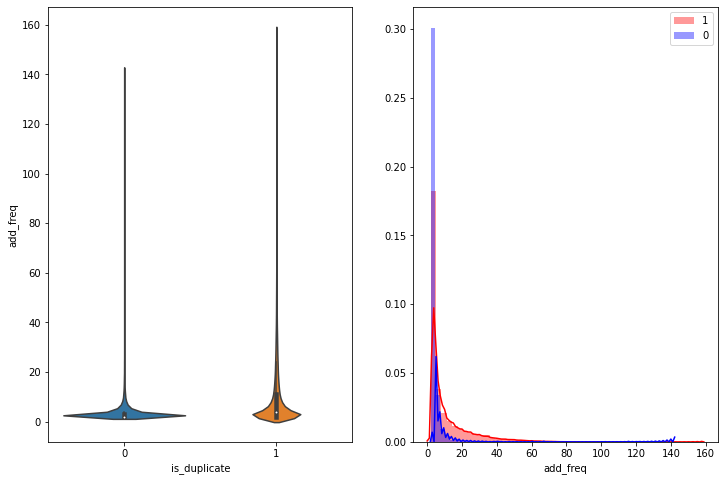

In [ ]:
plo('is_duplicate','add_freq')

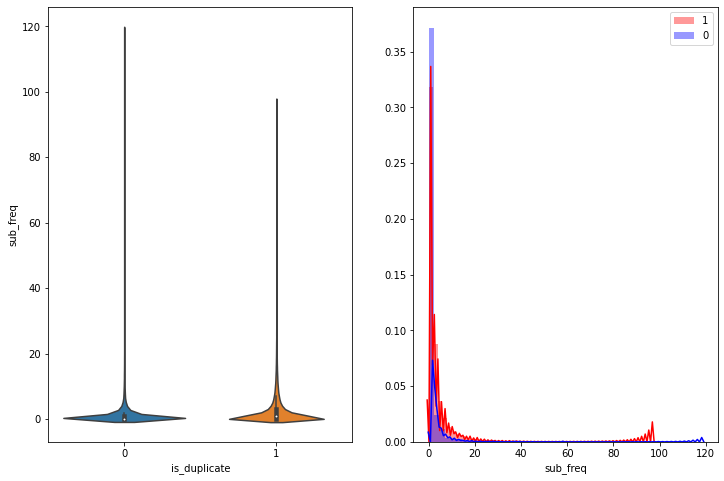

In [ ]:
plo('is_duplicate','sub_freq')

In [ ]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4,24,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0,19,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2,20,0.100000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,2,2,85,79,14,13,11,25,0.440000,4,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,12,1,41,42,8,9,5,17,0.294118,13,11
404287,404287,537928,537929,What is one coin?,What's this coin?,0,1,1,17,17,4,3,1,7,0.142857,2,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1,94,127,17,25,1,40,0.025000,2,0


In [ ]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/basic_features.pkl")

In [ ]:
df = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/basic_features.pkl")

**<h1>preprocessing of text data</h1>**

- Stemming words in sentence 
- removing stop words
- Expanding Contractions
- lowering the casese


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from tqdm.autonotebook import tqdm

porter=PorterStemmer()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [ ]:
def replac(x):
  x=x.replace("$","dollar")
  x=x.replace("€","euro")
  x=x.replace("₹","rupee")
  x=x.replace("¥","yen")
  x=x.replace("£","pound")
  x=x.replace("%","percent")
  x=x.replace("&","and")
  x=x.replace("'ll"," will")
  x=x.replace(","," ")
  x=x.replace("?"," ")
  x=x.replace("i'm","i am")
  x=x.replace("'s"," is")
  x=x.replace("'ve"," have")
  x=x.replace("won't","will not")
  x=x.replace("can't","can not")
  x=x.replace("n't"," not")
  x=x.replace(",000","k")
  x=x.replace("000,000","m")
  x=x.replace("000,000,000","b")
  x=x.replace("."," ")
  return x;

def preprocessing(x):
  x=x.lower()
  x=replac(x)
  x=BeautifulSoup(x)
  x=x.get_text()
  lis=x.split()
  
  st=""
  for word in lis:
    st+=porter.stem(word)
    st+=" "
  x=st;
  return x;

In [ ]:
tqdm.pandas()
df['question1']=df['question1'].progress_apply(preprocessing)
df['question2']=df['question2'].progress_apply(preprocessing)


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0
1,1,3,4,what is the stori of kohinoor (koh-i-noor) dia...,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,5,3
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,4,24,0.166667,2,0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when [math]23^{24}[/math] is ...,0,1,1,50,65,11,9,0,19,0.000000,2,0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0,2,2,85,79,14,13,11,25,0.440000,4,0
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1,12,1,41,42,8,9,5,17,0.294118,13,11
404287,404287,537928,537929,what is one coin,what is thi coin,0,1,1,17,17,4,3,1,7,0.142857,2,0
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0,1,1,94,127,17,25,1,40,0.025000,2,0


In [ ]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/preprocessing.pkl")

In [ ]:
df=pd.read_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/preprocessing.pkl")


<h1> Adding NLP and Fuzzy Based Features </h1>


In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

- cwcmin=common word count/min(no of words in q1,no of words in q2)

In [ ]:
tqdm.pandas()
def cwc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_words=set(que1).difference(set(stop_words))
  que2_words=set(que2).difference(set(stop_words))
  common_words=que1_words.intersection(que2_words)
  return len(common_words)/(min(len(que1_words),len(que2_words))+0.0001)

df['cwc_min']=df.progress_apply(cwc_min_cal,axis=1)

- cwcmax=common word count/max(no of words in q1,no of words in q2)

In [ ]:
tqdm.pandas()
def cwc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_words=set(que1).difference(set(stop_words))
  que2_words=set(que2).difference(set(stop_words))
  common_words=que1_words.intersection(que2_words)
  return len(common_words)/(max(len(que1_words),len(que2_words))+0.0001)

df['cwc_max']=df.progress_apply(cwc_max_cal,axis=1)

- cscmin= common stop word count/min(no of stop words in q1,no of stop words in q2)

In [ ]:
tqdm.pandas()
def csc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_stop_words=set(que1).intersection(set(stop_words))
  que2_stop_words=set(que2).intersection(set(stop_words))
  common_stop_words=que1_stop_words.intersection(que2_stop_words)
  return len(common_stop_words)/(min(len(que1_stop_words),len(que2_stop_words))+0.0001)
df['csc_min']=df.progress_apply(csc_min_cal,axis=1)

- cscmax= common stop word count/max(no of stop words in q1,no of stop words in q2)

In [ ]:
tqdm.pandas()
def csc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  que1_stop_words=set(que1).intersection(set(stop_words))
  que2_stop_words=set(que2).intersection(set(stop_words))
  common_stop_words=que1_stop_words.intersection(que2_stop_words)
  return len(common_stop_words)/(max(len(que1_stop_words),len(que2_stop_words))+0.0001)
df['csc_max']=df.progress_apply(csc_max_cal,axis=1)

- ctcmin=common token count/min(no of tokens in q1,no of tokens in q2)

In [ ]:
tqdm.pandas()
def ctc_min_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  common_token=set(que1).intersection(set(que2))
  return len(common_token)/(min(len(que1),len(que2))+0.0001)
df['ctc_min']=df.progress_apply(ctc_min_cal,axis=1)

- ctcmax=common token count/max(no of tokens in q1,no of tokens in q2)

In [ ]:
tqdm.pandas()
def ctc_max_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  common_token=set(que1).intersection(set(que2))
  return len(common_token)/(max(len(que1),len(que2))+0.0001)
df['ctc_max']=df.progress_apply(ctc_max_cal,axis=1)

- first_word_equal= 1 if first word of both questions are equal else 0

In [ ]:
tqdm.pandas()
def fir_word_eq_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  if(len(que1)==0 or len(que2)==0):
    return 0.0
  if(que1[0]==que2[0]):
    return 1.0;
  else:
    return 0.0;
df['fir_word_eq']=df.progress_apply(fir_word_eq_cal,axis=1)

- last_word_equal= 1 if last word of both questions are equal else 0

In [ ]:
tqdm.pandas()
def las_word_eq_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  if(len(que1)==0 or len(que2)==0):
    return 0.0
  if(que1[len(que1)-1]==que2[len(que2)-1]):
    return 1.0;
  else:
    return 0.0;
df['las_word_eq']=df.progress_apply(las_word_eq_cal,axis=1)

- absdiff_tokens=abs(no of tokens in q1- no of tokens in q2)

In [ ]:
tqdm.pandas()
def absdiff_token_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  return abs(len(que1)-len(que2))
df['absdiff_token']=df.progress_apply(absdiff_token_cal,axis=1)

- mean_token = average (tokens of q1,tokens of q2)

In [ ]:
tqdm.pandas()
def mean_token_cal(row):
  que1=row['question1'].split();
  que2=row['question2'].split();
  return (len(que1)+len(que2))/2

df['mean_token']=df.progress_apply(mean_token_cal,axis=1)

<h3> fuzzy Logic feature </h3>

- fuzz_ratio

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.6/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
tqdm.pandas()
def fuzz_ratio_cal(row):
  return fuzz.ratio(row['question1'],row['question2'])

df['fuzz_ratio']=df.progress_apply(fuzz_ratio_cal,axis=1)

- fuzz_partial_ratio


In [ ]:
tqdm.pandas()
def fuzz_partial_ratio_cal(row):
  return fuzz.partial_ratio(row['question1'],row['question2'])
df['fuzz_partial_ratio']=df.progress_apply(fuzz_partial_ratio_cal,axis=1)


- fuzz_sort_ratio

In [ ]:
tqdm.pandas()
def fuzz_sort_ratio_cal(row):
  return fuzz.token_sort_ratio(row['question1'],row['question2'])
df['fuzz_sort_ratio']=df.progress_apply(fuzz_sort_ratio_cal,axis=1)


- fuzz_set_ratio

In [ ]:
tqdm.pandas()
def fuzz_set_ratio_cal(row):
  return fuzz.token_set_ratio(row['question1'],row['question2'])
df['fuzz_set_ratio']=df.progress_apply(fuzz_set_ratio_cal,axis=1)


- Longest common subsequence ratio



In [ ]:
!pip install distance

In [ ]:
import distance
tqdm.pandas()
def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)
df["lcs_ratio"]  = df.progress_apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)


In [ ]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,absdiff_token,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.99998,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,2,13.0,93,100,92,100,0.982456


In [ ]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/advanced_features.pkl")

In [ ]:
df=pd.read_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/advanced_features.pkl")

<h1> Fuzzy Feature Analysis </h1>

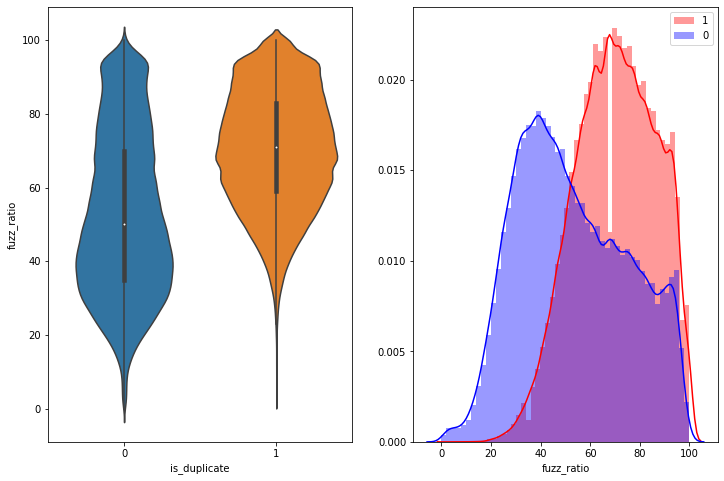

In [ ]:
plo('is_duplicate','fuzz_ratio')

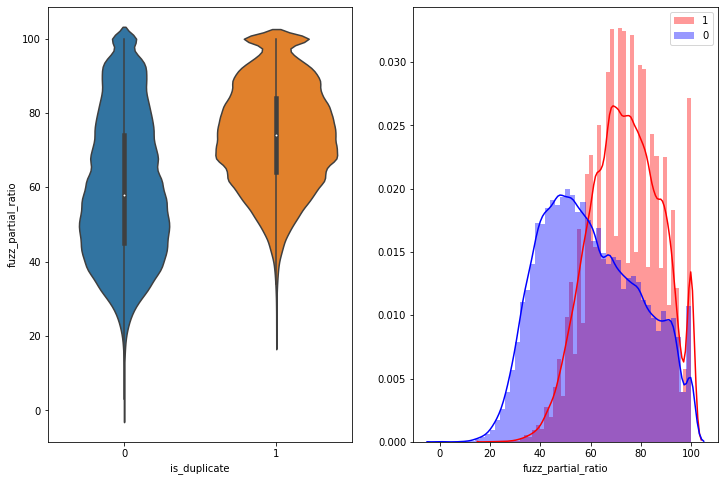

In [ ]:
plo('is_duplicate','fuzz_partial_ratio')

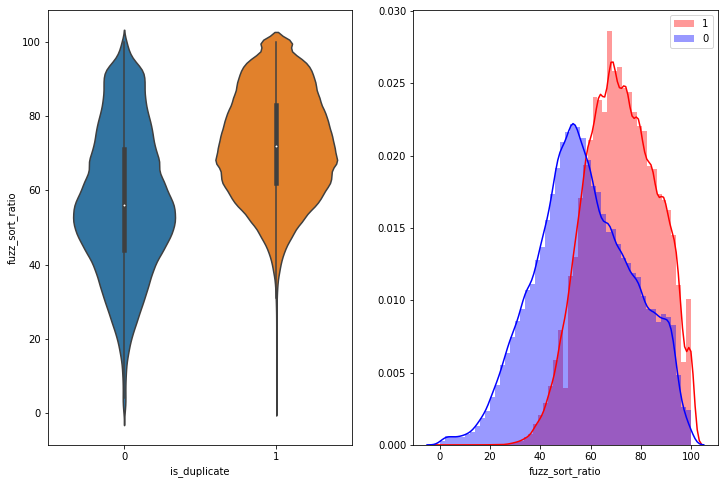

In [ ]:
plo('is_duplicate','fuzz_sort_ratio')

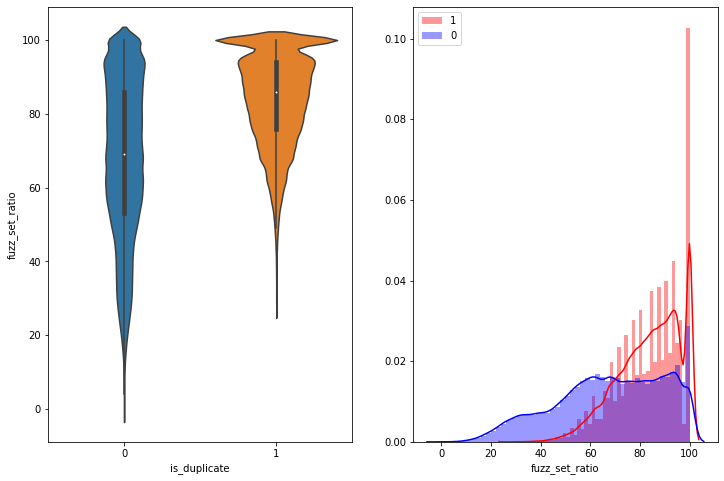

In [ ]:
plo('is_duplicate','fuzz_set_ratio')

<h1> Pair Plot of Natural language Processing features </h1>


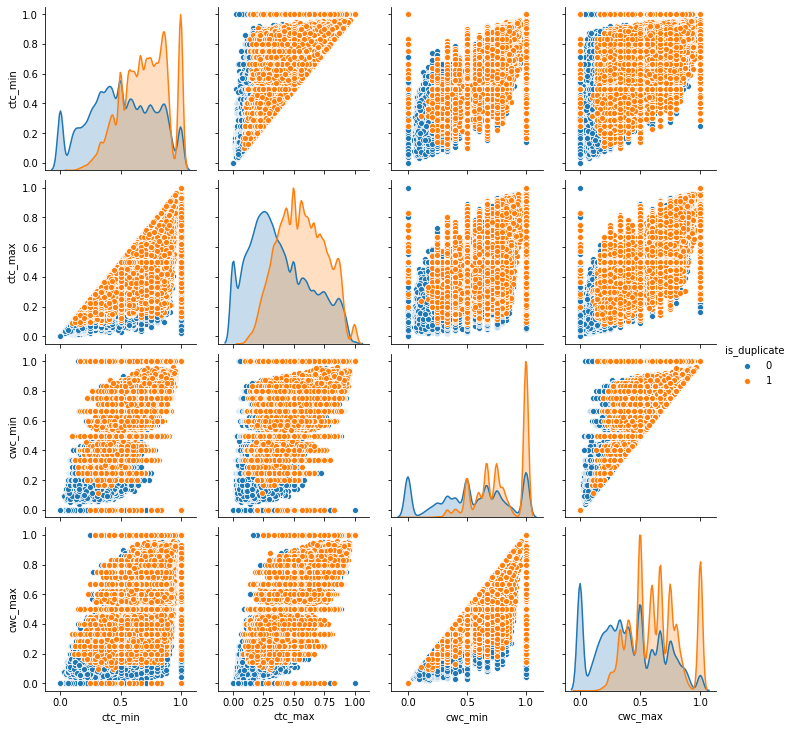

In [ ]:
fea=['ctc_min','ctc_max','cwc_min','cwc_max']
sns.pairplot(df[['ctc_min','ctc_max','cwc_min','cwc_max','is_duplicate']][:],hue='is_duplicate',vars=fea)
plt.show()

<h1> Plotting Word Cloud </h1>

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_dup=df[df['is_duplicate']==1]
df_ndup =df[df['is_duplicate'] == 0]


In [ ]:
du = np.dstack([df_dup["question1"], df_dup["question2"]]).flatten()
ndu = np.dstack([df_ndup["question1"], df_ndup["question2"]]).flatten()


In [ ]:
strdu=" ".join(list(du))
strndu=" ".join(list(ndu))


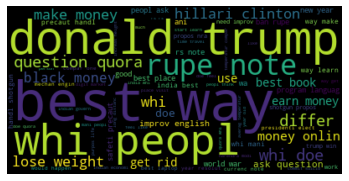

In [ ]:
wc=WordCloud(stopwords=stop_words)
wc.generate(strdu)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show() 

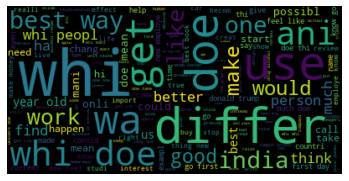

In [ ]:
wc=WordCloud(stopwords=stop_words )
wc.generate(strndu)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1> visualization (TSNE) </h1>

In [ ]:
df_sample=df[0:10000]
df_sample.head(1)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,absdiff_token,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.99998,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,2,13.0,93,100,92,100,0.982456


In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30,n_iter=1000)
tsne_df=pd.DataFrame(tsne.fit_transform(df_sample[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','las_word_eq','fir_word_eq','absdiff_token','mean_token','fuzz_ratio','fuzz_partial_ratio','fuzz_sort_ratio','fuzz_set_ratio','lcs_ratio']]),columns=['fea1','fea2'])
tsne_df['is_duplicate']=df_sample['is_duplicate']
tsne_df


,fea1,fea2,is_duplicate
0,27.304544,-44.996201,0
1,-40.792091,0.680698,0
2,14.047025,18.432695,0
3,74.875336,-10.709341,0
4,18.380407,32.782124,0
...,...,...,...
9995,47.205673,6.560429,0
9996,72.672981,-28.121675,0
9997,45.272179,4.733550,0
9998,-8.002438,-31.966541,1


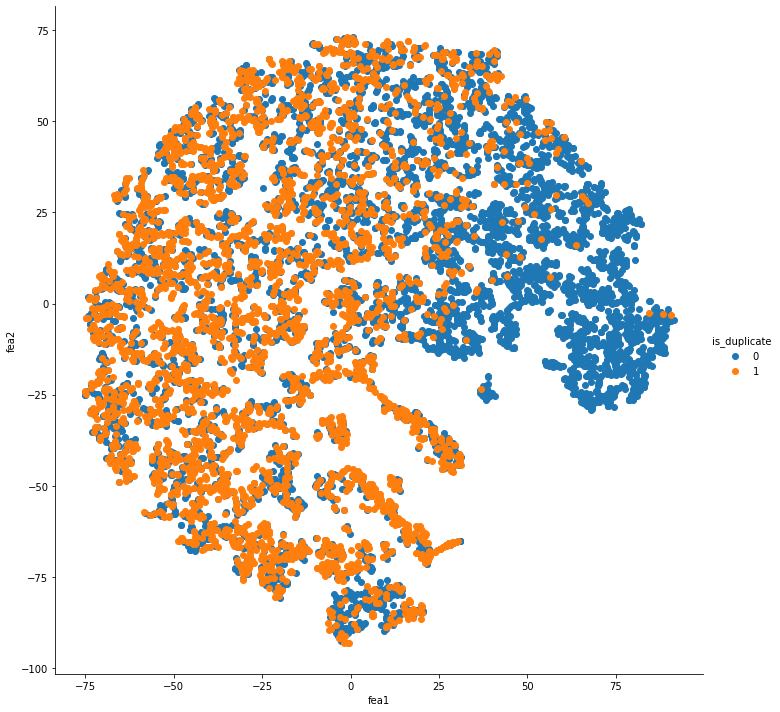

In [ ]:
sns.FacetGrid(tsne_df, hue='is_duplicate',height=10).map(plt.scatter,"fea1","fea2").add_legend()
plt.show()

<h1> Tfidf-word vector <h1>

In [ ]:
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [ ]:
ques=list(df['question1'])+list(df['question2'])

In [ ]:
tfidf=TfidfVectorizer()
spar_mat=tfidf.fit_transform(ques)

In [ ]:
idf_val=dict(zip(tfidf.get_feature_names(),tfidf.idf_))

In [ ]:
len(idf_val)

73318

In [ ]:
nlp = spacy.load('en_core_web_sm')
vectors = []
for question in tqdm(list(df['question1'])):
  doc = nlp(question)
  try:
    vec=np.zeros([len(doc[0].vector)])
  except:
    vec=np.zeros(96)
  for word in doc:
    word_vec= word.vector
    try:
      idf =idf_val[str(word)]
    except:
      idf = 0
    vec += (word_vec* idf)
  vectors.append(vec)
df['q1_w2v_idf'] = list(vectors)

Buffered data was truncated after reaching the output size limit.

In [17]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,absdiff_token,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio,q1_w2v_idf
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,2,13.0,93,100,92,100,0.982456,"[0.4328584671020508, 1.184251070022583, -79.07..."
1,1,3,4,what is the stori of kohinoor (koh-i-noor) dia...,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,5,3,0.749981,0.333330,0.666644,0.499988,0.624992,0.384612,1.0,0.0,5,10.5,68,73,65,86,0.596154,"[-43.17707824707031, -103.64567530155182, 1.45..."
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,4,24,0.166667,2,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,1.0,0.0,4,12.0,42,46,64,73,0.185185,"[75.4583957195282, -15.473590910434723, -29.78..."
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when [math]23^{24}[/math] is ...,0,1,1,50,65,11,9,0,19,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,10.5,23,27,27,31,0.044444,"[51.77442264556885, -0.23238635063171387, -45...."
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,4,2,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,1.0,0.0,6,10.0,37,55,49,68,0.179487,"[45.137425020337105, -105.7496120929718, 10.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0,2,2,85,79,14,13,11,25,0.440000,4,0,0.857131,0.857131,0.999980,0.833319,0.846147,0.785709,1.0,1.0,1,13.5,91,86,87,96,0.405405,"[33.754039883613586, -31.428068056702614, 95.5..."
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1,12,1,41,42,8,9,5,17,0.294118,13,11,0.666644,0.666644,0.599988,0.599988,0.624992,0.555549,0.0,1.0,1,8.5,73,77,70,79,0.658537,"[6.725346922874451, 8.443951427936554, 3.66598..."
404287,404287,537928,537929,what is one coin,what is thi coin,0,1,1,17,17,4,3,1,7,0.142857,2,0,0.499975,0.499975,0.999950,0.999950,0.749981,0.749981,1.0,1.0,0,4.0,82,82,81,86,0.444444,"[8.943887948989868, -31.81389832496643, -8.161..."
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0,1,1,94,127,17,25,1,40,0.025000,2,0,0.000000,0.000000,0.124998,0.099999,0.058823,0.040000,0.0,0.0,8,21.0,33,37,34,36,0.056180,"[67.40239641536027, -124.50584959983826, -65.8..."


In [35]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/tfidfw2v_q1.pkl")

In [36]:
df=pd.read_pickle('/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/tfidfw2v_q1.pkl')

In [28]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio,absdiff_token,q1_w2v_idf
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,13.0,93,100,92,100,0.982456,2,"[0.4328584671020508, 1.184251070022583, -79.07..."
1,1,3,4,what is the stori of kohinoor (koh-i-noor) dia...,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,5,3,0.749981,0.333330,0.666644,0.499988,0.624992,0.384612,1.0,0.0,10.5,68,73,65,86,0.596154,5,"[-43.17707824707031, -103.64567530155182, 1.45..."
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,4,24,0.166667,2,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,1.0,0.0,12.0,42,46,64,73,0.185185,4,"[75.4583957195282, -15.473590910434723, -29.78..."
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when [math]23^{24}[/math] is ...,0,1,1,50,65,11,9,0,19,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,10.5,23,27,27,31,0.044444,1,"[51.77442264556885, -0.23238635063171387, -45...."
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,4,2,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,1.0,0.0,10.0,37,55,49,68,0.179487,6,"[45.137425020337105, -105.7496120929718, 10.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0,2,2,85,79,14,13,11,25,0.440000,4,0,0.857131,0.857131,0.999980,0.833319,0.846147,0.785709,1.0,1.0,13.5,91,86,87,96,0.405405,1,"[33.754039883613586, -31.428068056702614, 95.5..."
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1,12,1,41,42,8,9,5,17,0.294118,13,11,0.666644,0.666644,0.599988,0.599988,0.624992,0.555549,0.0,1.0,8.5,73,77,70,79,0.658537,1,"[6.725346922874451, 8.443951427936554, 3.66598..."
404287,404287,537928,537929,what is one coin,what is thi coin,0,1,1,17,17,4,3,1,7,0.142857,2,0,0.499975,0.499975,0.999950,0.999950,0.749981,0.749981,1.0,1.0,4.0,82,82,81,86,0.444444,0,"[8.943887948989868, -31.81389832496643, -8.161..."
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0,1,1,94,127,17,25,1,40,0.025000,2,0,0.000000,0.000000,0.124998,0.099999,0.058823,0.040000,0.0,0.0,21.0,33,37,34,36,0.056180,8,"[67.40239641536027, -124.50584959983826, -65.8..."


In [18]:
nlp = spacy.load('en_core_web_sm')
vectors = []
for question in tqdm(list(df['question2'])):
  doc = nlp(question)
  try:
    vec=np.zeros([len(doc[0].vector)])
  except:
    vec=np.zeros(96)
  for word in doc:
    word_vec= word.vector
    try:
      idf =idf_val[str(word)]
    except:
      idf = 0
    vec += (word_vec* idf)
  vectors.append(vec)
df['q2_w2v_idf'] = list(vectors)

In [20]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/tfidfw2v.pkl")

In [39]:
df=pd.read_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/tfidfw2v.pkl")

In [40]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,absdiff_token,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio,q1_w2v_idf,q2_w2v_idf
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,2,13.0,93,100,92,100,0.982456,"[0.4328584671020508, 1.184251070022583, -79.07...","[-1.9445083141326904, 6.821384400129318, -75.1..."
1,1,3,4,what is the stori of kohinoor (koh-i-noor) dia...,what would happen if the indian govern stole t...,0,4,1,51,88,8,13,4,20,0.200000,5,3,0.749981,0.333330,0.666644,0.499988,0.624992,0.384612,1.0,0.0,5,10.5,68,73,65,86,0.596154,"[-43.17707824707031, -103.64567530155182, 1.45...","[-57.74214804172516, -83.53995203971863, -83.8..."
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,1,1,73,59,14,10,4,24,0.166667,2,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,1.0,0.0,4,12.0,42,46,64,73,0.185185,"[75.4583957195282, -15.473590910434723, -29.78...","[69.02625751495361, 38.26318407058716, 8.77420..."
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when [math]23^{24}[/math] is ...,0,1,1,50,65,11,9,0,19,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,10.5,23,27,27,31,0.044444,"[51.77442264556885, -0.23238635063171387, -45....","[34.59304878115654, 5.273554429411888, 136.369..."
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,3,1,76,39,13,7,2,20,0.100000,4,2,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,1.0,0.0,6,10.0,37,55,49,68,0.179487,"[45.137425020337105, -105.7496120929718, 10.08...","[-25.485764026641846, -20.296311408281326, -74..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how mani keyword are there in the racket progr...,how mani keyword are there in perl program lan...,0,2,2,85,79,14,13,11,25,0.440000,4,0,0.857131,0.857131,0.999980,0.833319,0.846147,0.785709,1.0,1.0,1,13.5,91,86,87,96,0.405405,"[33.754039883613586, -31.428068056702614, 95.5...","[50.94392442703247, -52.74073268473148, 90.094..."
404286,404286,18840,155606,do you believ there is life after death,is it true that there is life after death,1,12,1,41,42,8,9,5,17,0.294118,13,11,0.666644,0.666644,0.599988,0.599988,0.624992,0.555549,0.0,1.0,1,8.5,73,77,70,79,0.658537,"[6.725346922874451, 8.443951427936554, 3.66598...","[58.14313405752182, 3.7129895091056824, 30.583..."
404287,404287,537928,537929,what is one coin,what is thi coin,0,1,1,17,17,4,3,1,7,0.142857,2,0,0.499975,0.499975,0.999950,0.999950,0.749981,0.749981,1.0,1.0,0,4.0,82,82,81,86,0.444444,"[8.943887948989868, -31.81389832496643, -8.161...","[-3.2851595878601074, -24.044153288006783, -19..."
404288,404288,537930,537931,what is the approx annual cost of live while s...,i am have littl hairfal problem but i want to ...,0,1,1,94,127,17,25,1,40,0.025000,2,0,0.000000,0.000000,0.124998,0.099999,0.058823,0.040000,0.0,0.0,8,21.0,33,37,34,36,0.056180,"[67.40239641536027, -124.50584959983826, -65.8...","[0.40462327003479004, 16.933851204812527, -99...."


In [ ]:
dfq1=pd.DataFrame((df['q1_w2v_idf'].values).tolist(),index=df.index,columns=["q1_"+str(i) for i in range(len(df['q1_w2v_idf'][0]))])
dfq2=pd.DataFrame((df['q2_w2v_idf'].values).tolist(),index=df.index,columns=["q2_"+str(i) for i in range(len(df['q2_w2v_idf'][0]))])
dfq1['id']=df.id
dfq2['id']=df.id
dfq1q2  = dfq1.merge(dfq2, on='id',how='left')
df=df.merge(dfq1q2,on='id',how='left')
df.drop(['id','q1_w2v_idf','q2_w2v_idf','qid1','qid2','question1','question2'],axis=1,inplace=True)

In [48]:
df.to_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/final_df.pkl")

In [2]:
df=pd.read_pickle("/content/drive/My Drive/Colab Notebooks/project Question Pair Similarity/final_df.pkl")

In [4]:
df=df[0:50000]

In [3]:
df.head()

,is_duplicate,freq_qid1,freq_qid2,q1_len,q2_len,q1_wordscount,q2_wordscount,common_words_count,tot_words,words_ratio,add_freq,sub_freq,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,fir_word_eq,las_word_eq,absdiff_token,mean_token,fuzz_ratio,fuzz_partial_ratio,fuzz_sort_ratio,fuzz_set_ratio,lcs_ratio,q1_0,q1_1,q1_2,q1_3,q1_4,q1_5,q1_6,q1_7,q1_8,q1_9,q1_10,q1_11,q1_12,...,q2_56,q2_57,q2_58,q2_59,q2_60,q2_61,q2_62,q2_63,q2_64,q2_65,q2_66,q2_67,q2_68,q2_69,q2_70,q2_71,q2_72,q2_73,q2_74,q2_75,q2_76,q2_77,q2_78,q2_79,q2_80,q2_81,q2_82,q2_83,q2_84,q2_85,q2_86,q2_87,q2_88,q2_89,q2_90,q2_91,q2_92,q2_93,q2_94,q2_95
0,0,1,1,66,57,14,12,10,23,0.434783,2,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,1.0,0.0,2,13.0,93,100,92,100,0.982456,0.432858,1.184251,-79.075381,46.536015,132.704987,111.631499,35.415172,48.490576,65.889647,201.130802,74.736368,-52.147830,33.109966,...,88.951844,42.082470,-45.432802,91.015901,98.406734,-67.932206,117.464505,43.363752,16.127875,-63.742576,45.489958,-45.014755,-61.510804,34.150613,-82.971545,-2.190674,-0.720977,-29.039061,-43.851788,53.861247,80.679485,-78.964311,18.190037,4.739448,35.820504,-76.142212,-49.946855,-10.154953,4.509305,-24.203900,-45.371421,-44.488954,-24.941683,61.181215,-61.857600,-28.341094,-50.313681,95.862897,65.617940,-11.565448
1,0,4,1,51,88,8,13,4,20,0.200000,5,3,0.749981,0.333330,0.666644,0.499988,0.624992,0.384612,1.0,0.0,5,10.5,68,73,65,86,0.596154,-43.177078,-103.645675,1.459520,56.345456,200.971978,-45.233807,31.873285,43.473560,49.671660,114.304494,19.489416,-18.188627,15.590492,...,185.755991,104.225004,-53.286268,-8.891956,-57.891728,-70.108754,82.254034,-38.307756,80.674135,15.395051,39.020715,2.022104,-9.192404,35.098901,-70.506673,98.751728,17.343088,-28.363536,-79.731743,38.292798,82.849092,-95.342638,-0.397853,-19.871661,-33.802880,-178.621411,-22.068587,24.962184,7.915949,88.989704,62.905993,-42.690423,-47.456523,25.982496,64.282907,122.086550,-26.931059,144.944750,53.775919,51.537951
2,0,1,1,73,59,14,10,4,24,0.166667,2,0,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,1.0,0.0,4,12.0,42,46,64,73,0.185185,75.458396,-15.473591,-29.781574,40.920407,61.370246,37.844341,46.421149,59.001733,91.601383,190.267927,-15.599659,-29.561471,-28.607632,...,82.186697,16.406837,-9.787140,73.426954,115.752851,-30.721300,-7.693402,-34.343358,14.759697,-115.687793,51.111440,-49.584419,-52.287683,67.243699,-25.975815,17.538049,57.951104,38.806707,-11.172077,-36.808821,52.517503,-68.427013,15.644865,31.332982,-41.434821,-38.882868,-78.168259,41.959239,25.278031,-24.192399,-3.462749,-47.953315,12.396179,22.033580,-82.169005,-110.450102,-82.992704,10.334059,-24.018235,6.078082
3,0,1,1,50,65,11,9,0,19,0.000000,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1,10.5,23,27,27,31,0.044444,51.774423,-0.232386,-45.288607,-24.013134,23.393560,41.867778,31.365234,59.611641,75.636473,118.789880,6.252717,-71.686275,66.876705,...,59.961461,33.506382,24.902798,3.299243,96.246319,-72.055452,89.473715,-83.713595,42.668537,-89.497771,115.174945,-62.307154,11.939718,45.743857,47.155073,-2.011583,113.064345,10.899965,20.480287,-5.148312,100.079331,-23.443783,62.897073,-69.593107,-92.455414,-53.058123,-27.507045,55.764161,-21.191676,9.873841,12.150182,9.559869,-14.915386,-36.133043,-0.436226,-54.423090,-19.116199,-42.761964,-8.170808,-9.972539
4,0,3,1,76,39,13,7,2,20,0.100000,4,2,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,1.0,0.0,6,10.0,37,55,49,68,0.179487,45.137425,-105.749612,10.080766,45.267658,-37.104984,47.320916,-29.714512,126.836667,84.681240,225.917255,131.567640,-7.465129,172.459568,...,40.731003,12.502210,-52.325042,95.521065,48.093457,-48.022779,35.872247,39.123260,65.405811,-14.395705,30.228895,-1.782801,-48.267762,62.137462,18.458295,15.580266,-22.798817,7.502959,-59.327845,43.851389,72.782844,-68.422085,-7.163878,15.726429,48.837445,-73.361578,-51.145343,4.149604,-20.637810,-40.718366,51.227609,55.974095,-53.654031,26.660186,33.539773,-13.873266,-101.1

In [5]:
x_label=df.iloc[:,1:]
y_label=df.iloc[:,0:1]

In [6]:
y_val=list(map(int,y_label.values))

<h1>Train Test Splitting in stratified Way</h1>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_label,y_val,stratify=y_val,test_size=0.3) 

<h1> Training a Random Model

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import log_loss

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
y_predict=np.zeros((len(y_test),2))
for i in range(len(y_test)):
    rand_val= np.random.rand(1,2)
    y_predict[i] = ((rand_val/sum(sum(rand_val)))[0])
#print(Y_predict)
print("Log loss on Test Data using Random Model",log_loss(y_test, y_predict, eps=1e-15))

Log loss on Test Data using Random Model 0.8823699039755926


In [11]:
y_predict=np.argmax(y_predict,axis=1)
confusion_matrix(y_test,y_predict)

array([[4719, 4686],
       [2759, 2836]])

<h1> Logistic Regression </h1>


In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [15]:
mi=100000
best_alpha=-1;
alpha=[10**i for i in range(-5,2)]
for i in tqdm(alpha):
  model=SGDClassifier(alpha=i,random_state=42 ,loss='log') 
  #model.fit(x_train,y_train)
  sig_model=CalibratedClassifierCV(model,method='sigmoid')
  sig_model.fit(x_train,y_train)
  y_predict=sig_model.predict_proba(x_test)
  logloss=log_loss(y_test,y_predict)
  if(mi>logloss):
    mi=logloss
    best_alpha=i
  print("alpha->",i,"\t\tlog-loss->",logloss)

alpha-> 1e-05 		log-loss-> 0.6605330476053078
alpha-> 0.0001 		log-loss-> 0.4666742186703902
alpha-> 0.001 		log-loss-> 0.4570106945929709
alpha-> 0.01 		log-loss-> 0.4686600424739401
alpha-> 0.1 		log-loss-> 0.4645756522693267
alpha-> 1 		log-loss-> 0.49195412631810687
alpha-> 10 		log-loss-> 0.5342089971547279



In [16]:
best_model=SGDClassifier(alpha=best_alpha,random_state=42,loss="log")
best_model=CalibratedClassifierCV(best_model,method="sigmoid")
best_model.fit(x_train,y_train)
y_predict=best_model.predict_proba(x_train)
print("Train Log Loss -->",log_loss(y_train,y_predict))
y_predict=best_model.predict_proba(x_test)
print("Test Log Loss -->",log_loss(y_test,y_predict))
y_predict=np.argmax(y_predict,axis=1)
confusion_matrix(y_test,y_predict)


Train Log Loss --> 0.44940948222176946
Test Log Loss --> 0.4570106945929709


array([[8720,  685],
       [2862, 2733]])

<h1> SVM (Support Vector Machine) </h1>

In [17]:
mi=100000
best_alpha=-1;
alpha=[10**i for i in range(-5,2)]
for i in tqdm(alpha):
  model=SGDClassifier(alpha=i,random_state=42,loss="hinge")
  #model.fit(x_train,y_train)
  sig_model=CalibratedClassifierCV(model,method='sigmoid')
  sig_model.fit(x_train,y_train)
  y_predict=sig_model.predict_proba(x_test)
  logloss=log_loss(y_test,y_predict)
  if(mi>logloss):
    mi=logloss
    best_alpha=i
  print("alpha->",i,"\t\tlog-loss->",logloss)

alpha-> 1e-05 		log-loss-> 0.6605330476053078
alpha-> 0.0001 		log-loss-> 0.4634905287679223
alpha-> 0.001 		log-loss-> 0.4750991976193606
alpha-> 0.01 		log-loss-> 0.4646421105440706
alpha-> 0.1 		log-loss-> 0.4644291629590174
alpha-> 1 		log-loss-> 0.4794586882431717
alpha-> 10 		log-loss-> 0.5246892055012432



In [18]:
best_model=SGDClassifier(alpha=best_alpha,random_state=42,loss="hinge")
best_model=CalibratedClassifierCV(best_model,method="sigmoid")
best_model.fit(x_train,y_train)
y_predict=best_model.predict_proba(x_train)
print("Train Log Loss -->",log_loss(y_train,y_predict))
y_predict=best_model.predict_proba(x_test)
print("Test Log Loss -->",log_loss(y_test,y_predict))
y_predict=np.argmax(y_predict,axis=1)
confusion_matrix(y_test,y_predict)


Train Log Loss --> 0.454349919628213
Test Log Loss --> 0.4634905287679223


array([[8536,  869],
       [2592, 3003]])

<h1> XGBoost </h1>

In [19]:
import xgboost as xgb   

In [20]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
d_train=xgb.DMatrix(x_train,label=y_train)
d_test=xgb.DMatrix(x_test,label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(x_train,y_train)
y_predict = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, y_predict, eps=1e-15))

[0]	train-logloss:0.68488	valid-logloss:0.684905
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615674	valid-logloss:0.616375
[20]	train-logloss:0.564416	valid-logloss:0.565923
[30]	train-logloss:0.524227	valid-logloss:0.526743
[40]	train-logloss:0.494325	valid-logloss:0.497473
[50]	train-logloss:0.470758	valid-logloss:0.474477
[60]	train-logloss:0.452238	valid-logloss:0.456458
[70]	train-logloss:0.43735	valid-logloss:0.442086
[80]	train-logloss:0.425155	valid-logloss:0.430372
[90]	train-logloss:0.415206	valid-logloss:0.420868
[100]	train-logloss:0.406922	valid-logloss:0.413016
[110]	train-logloss:0.400059	valid-logloss:0.406502
[120]	train-logloss:0.394245	valid-logloss:0.401131
[130]	train-logloss:0.38939	valid-logloss:0.396654
[140]	train-logloss:0.385145	valid-logloss:0.392833
[150]	train-logloss:0.381307	valid-logloss:0.389409
[160]	train-logloss:0.377982	va

In [21]:
y_predict=np.array(y_predict>0.5,dtype=int)
confusion_matrix(y_test,y_predict)

array([[8376, 1029],
       [1715, 3880]])